In [21]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
night_img = cv2.imread('./test_assets/night_1.png')
day_img = cv2.imread('./test_assets/day_1.png')

canvas_night = cv2.cvtColor(night_img, cv2.COLOR_BGR2GRAY)
canvas_day = cv2.cvtColor(day_img, cv2.COLOR_BGR2GRAY)
print(canvas_day.shape)

(686, 1306)


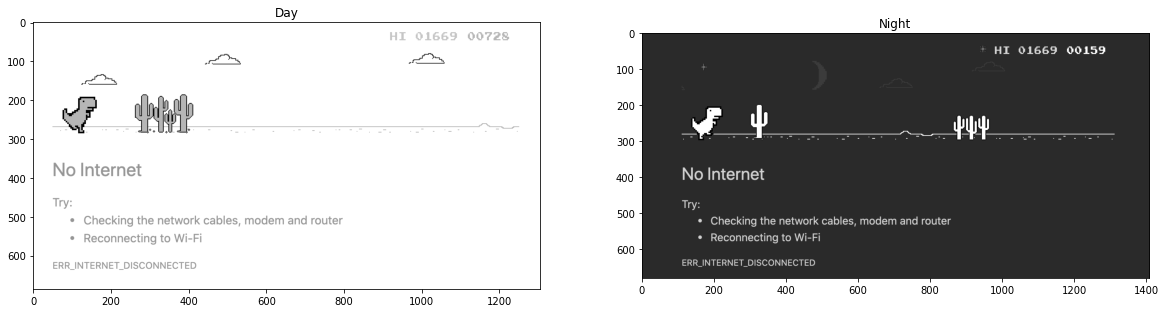

In [60]:
# plt.figure(figsize=(20,6))
_, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].imshow(canvas_day, cmap='gray')
ax[0].set_title('Day')
ax[1].imshow(canvas_night, cmap='gray')
ax[1].set_title('Night')
plt.show()

In [63]:
print(np.median(canvas_day), np.median(canvas_night))

255.0 30.0


Loading a templare with `dino` to perform a search and detect bounderies on the canvas

In [59]:
canny_day = cv2.Canny(canvas_day, threshold1=0, threshold2=255)
canny_night = cv2.Canny(canvas_night, threshold1=0, threshold2=255)

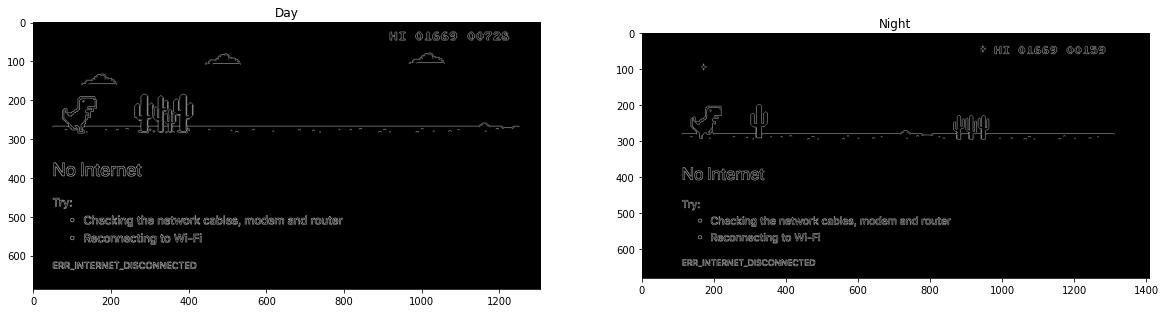

In [115]:
_, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].imshow(canny_day, cmap='gray')
ax[0].set_title('Day')
ax[1].imshow(canny_night, cmap='gray')
ax[1].set_title('Night')
plt.show()

In [145]:
dino_template = cv2.imread('./assets/dino_crop.png')
dino_template = cv2.cvtColor(dino_template, cv2.COLOR_BGR2GRAY)

In [146]:
dino_bordered_template = cv2.Canny(dino_template, threshold1=0, threshold2=255)

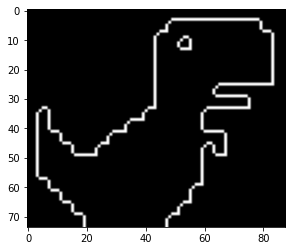

In [147]:
plt.imshow(dino_bordered_template, cmap='gray')

In [161]:
match_res = cv2.matchTemplate(canny_night, dino_bordered_template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match_res)

In [162]:
print(max_val, max_loc)

0.811663031578064 (136, 206)
